<h1 style="text-align: center;">Hello! Welcome to my notebook💕💕

<img src="https://market-uploader.com/wp-content/uploads/2019/08/Credit-card.jpg" alt="cedit Image" width="900" height="700" style="display: block; margin: auto;">

In [171]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers-prediction/BankChurners.csv


# 📌Readiing The Data

In [172]:
df = pd.read_csv('/kaggle/input/credit-card-customers-prediction/BankChurners.csv')
df.head() #first 5 rows

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# 📌Data Cleaning and Exploratory

In [177]:
print(f'Data has {df.shape[0]} rows , {df.shape[1]} columns.')

Data has 10127 rows , 23 columns.


In [178]:
df.columns #display cols' names

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

<h3>📍📍Rename some cols

In [179]:
df.iloc[:,-2:]

,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,0.000093,0.999910
1,0.000057,0.999940
2,0.000021,0.999980
3,0.000134,0.999870
4,0.000022,0.999980
...,...,...
10122,0.000191,0.999810
10123,0.995270,0.004729
10124,0.997880,0.002118
10125,0.996710,0.003294


In [180]:
df = df.rename(columns={df.columns[-2]: 'naive1', df.columns[-1]: 'naive2'})
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,naive1,naive2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<h3>📍📍Checking Null values

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
naive1                      0
naive2                      0
dtype: int64


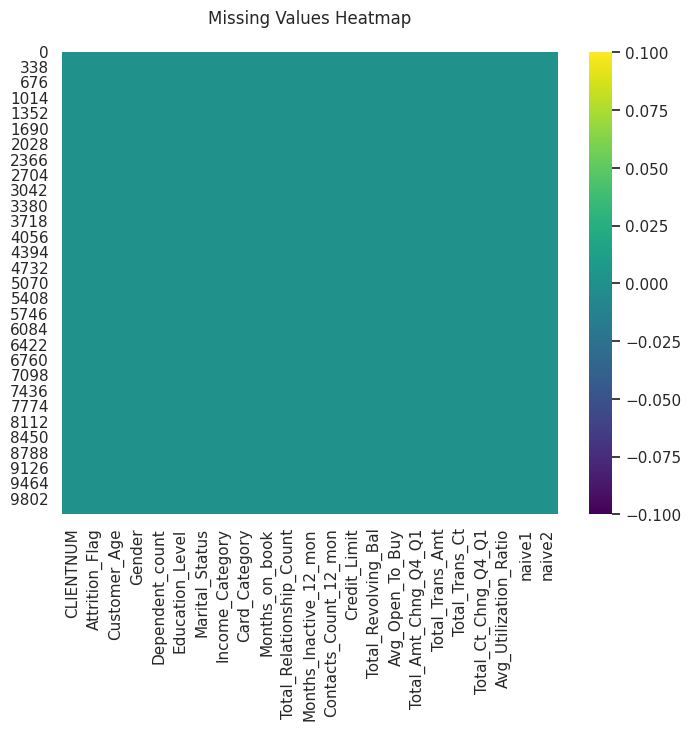

In [191]:
print(df.isnull().sum())
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Missing Values Heatmap\n',fontsize=12)
plt.show()


***Note : Data has no Null Values***

<h3>📍📍Checking Duplicated Rows

In [182]:
print("Num of Duplicated Rows is: ",df.duplicated().sum())

Num of Duplicated Rows is:  0


<h3>📍📍Checking for Data Types

In [183]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
naive1                      float64
naive2                      float64
dtype: object

# 📌Preprocessing and Some visualizations 

<h3>📍📍'Income_Category' col

In [184]:
# Mapping income categories to numerical values
income_mapping = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'Unknown': -1  
}

df['Income_Category'] = df['Income_Category'].map(income_mapping)

df['Income_Category']

0        2
1        0
2        3
3        0
4        2
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: Income_Category, Length: 10127, dtype: int64

In [185]:
df['Income_Category'].dtype 

dtype('int64')

<h3>📍📍'CLIENTNUM' col

In [186]:
# Calculate the number of unique values in the 'Income_Category' column
num_unique_values = df['CLIENTNUM'].nunique()

def is_unique(col_name):
    num_unique_values = df['CLIENTNUM'].nunique()
    if(num_unique_values==df.shape[0]):
        print(col_name," has unique Values")
    else:
        print(col_name,"Col doesn,t have unoque Values")
        

is_unique('CLIENTNUM') # we can drop it now or later

CLIENTNUM  has unique Values


<h3>📍📍'Customer_Age' col

Min of ages is  26
Max of ages is  73
Most freq age is  44
Range of ages from  26 to  73


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


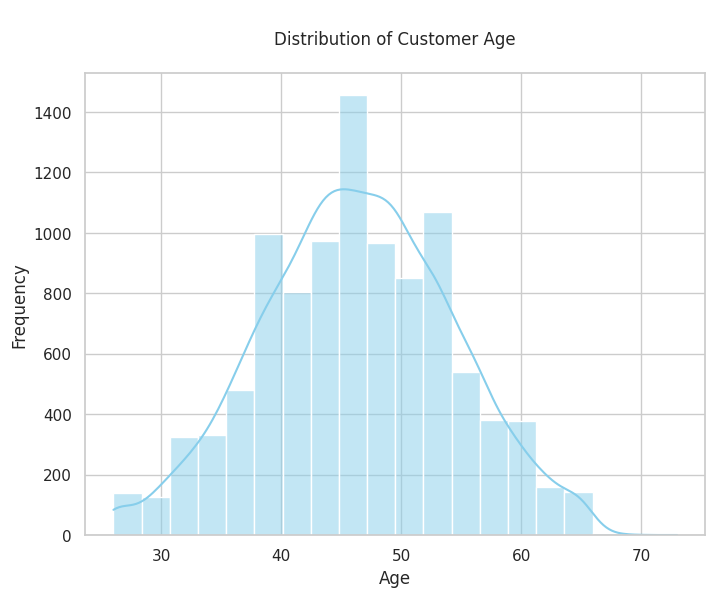

In [192]:
print("Min of ages is ",df['Customer_Age'].min())
print("Max of ages is ",df['Customer_Age'].max())
print("Most freq age is ",df['Customer_Age'].mode()[0])
print("Range of ages from ",df['Customer_Age'].min(),"to ",df['Customer_Age'].max())

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.histplot(df['Customer_Age'], bins=20, kde=True, color='skyblue')

plt.title('\nDistribution of Customer Age\n',fontsize=12)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

<h3>📍📍"Gender" col

Count of males   : 4769
Count of Females : 5358


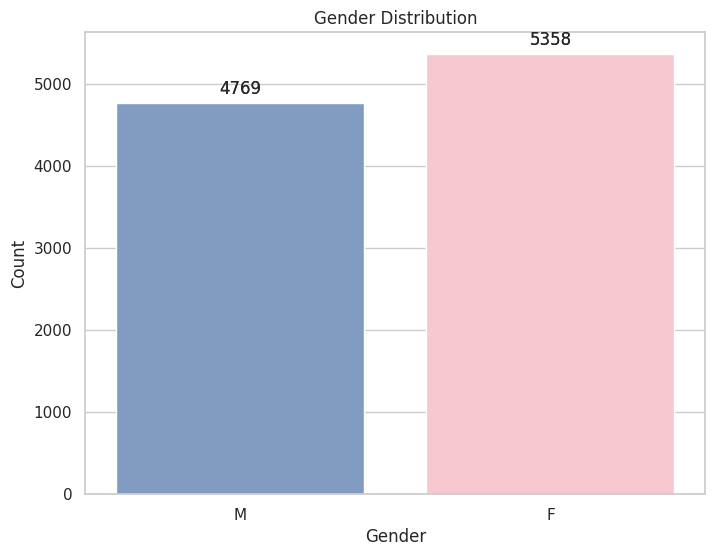

In [193]:
male_count = len(df[df['Gender'] == 'M'])
print("Count of males   :", male_count)


female_count = len(df[df['Gender'] == 'F'])
print("Count of Females :", female_count)


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

custom_palette = {"M": '#7799cc', "F": "pink"}

sns.countplot(data=df, x='Gender', palette=custom_palette)

ax = sns.countplot(data=df, x='Gender', palette=custom_palette)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

<h3>📍📍Group by 'Attrition_Flag' and 'Gender' and count the occurrences

In [17]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [194]:

relation_counts = df.groupby(['Attrition_Flag', 'Gender']).size().reset_index(name='count')

print(relation_counts)


      Attrition_Flag Gender  count
0  Attrited Customer      F    930
1  Attrited Customer      M    697
2  Existing Customer      F   4428
3  Existing Customer      M   4072


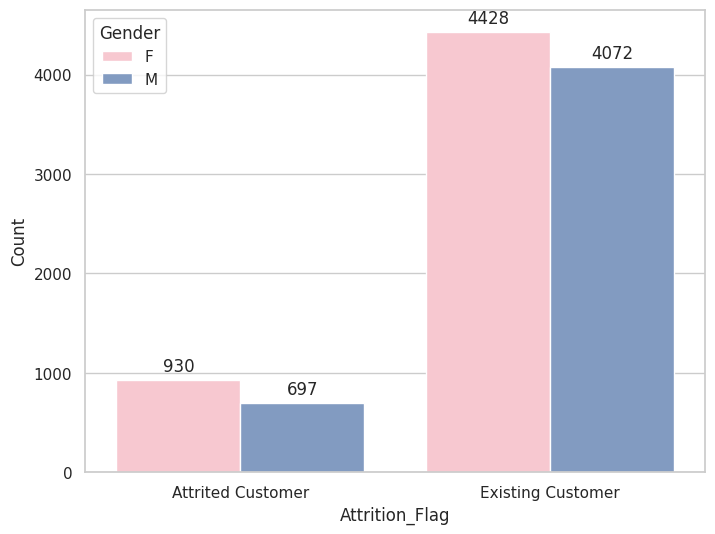

In [195]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")


custom_palette = {"M": '#7799cc', "F": "pink"}


ax = sns.barplot(data=relation_counts, x='Attrition_Flag', y='count', hue='Gender', palette=custom_palette)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


plt.ylabel('Count')
plt.legend(title='Gender')

plt.show()

<h3>📍📍'Marital_Status' col

In [196]:
df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

Count of Married : 4687
Count of Single  : 3943
Count of Unknown : 749
Count of Divorced: 748


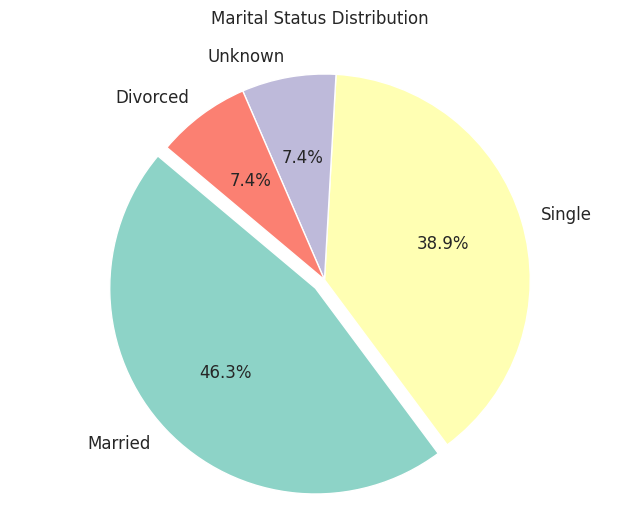

In [198]:
Married = len(df[df['Marital_Status'] == 'Married'])
print("Count of Married :", Married)

Single = len(df[df['Marital_Status'] == 'Single'])
print("Count of Single  :", Single)

Unknown = len(df[df['Marital_Status'] == 'Unknown'])
print("Count of Unknown :", Unknown)

Divorced = len(df[df['Marital_Status'] == 'Divorced'])
print("Count of Divorced:", Divorced)


marital_status_counts = df['Marital_Status'].value_counts()
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
colors = sns.color_palette('Set3')


explode = [0.06 if label == 'Married' else 0 for label in marital_status_counts.index]

plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%',explode=explode ,startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title('Marital Status Distribution\n')

plt.axis('equal')
plt.show()


<h3>📍📍"Card_Category" col

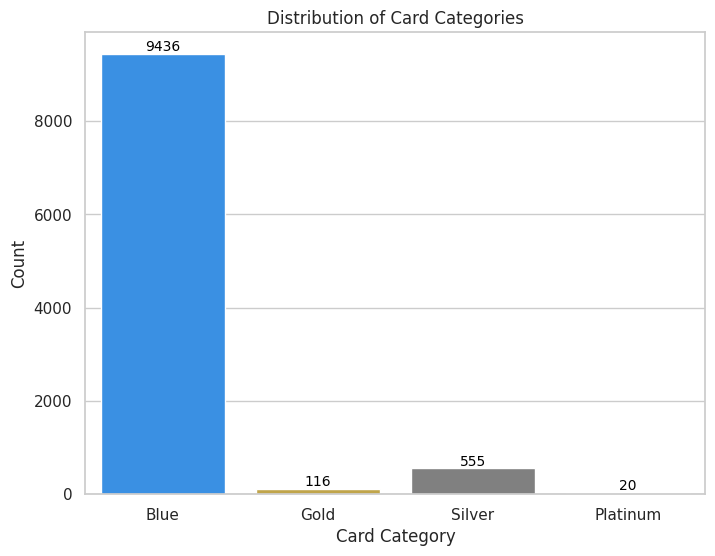

In [199]:
colors = ['#1E90FF', '#D4AF37', '#808080', '#E5E4E2']

sns.set_palette(colors)


plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Card_Category')
sns.set(style="whitegrid")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Card Categories')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.show()


<h3>📍📍Group by 'Card_Category' and calculate the average 'Credit_Limit' within each group


Average Credit Limit for Each Card Category:
Card_Category
Blue         7363.780002
Gold        28416.370690
Platinum    30283.450000
Silver      25277.836036
Name: Credit_Limit, dtype: float64


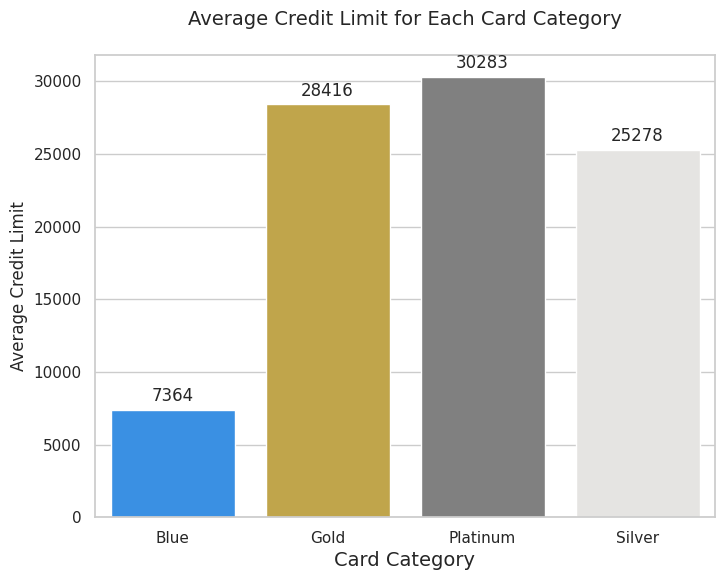

In [201]:
average_credit_limit = df.groupby('Card_Category')['Credit_Limit'].mean()

# Display the result
print("Average Credit Limit for Each Card Category:")
print(average_credit_limit)


colors = ['#1E90FF', '#D4AF37', '#808080', '#E5E4E2']

sns.set_palette(colors)
plt.figure(figsize=(8, 6))


ax=sns.barplot(x=average_credit_limit.index, y=average_credit_limit.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Average Credit Limit for Each Card Category\n', fontsize=14)
plt.xlabel('Card Category', fontsize=14)
plt.ylabel('Average Credit Limit')
plt.show()

<h3>📍📍Group by 'Attrition_Flag' and 'Gender' and count the occurrences

In [202]:
relation_counts = df.groupby(['Marital_Status', 'Gender']).size().reset_index(name='count')

print(relation_counts)

  Marital_Status Gender  count
0       Divorced      F    402
1       Divorced      M    346
2        Married      F   2451
3        Married      M   2236
4         Single      F   2125
5         Single      M   1818
6        Unknown      F    380
7        Unknown      M    369


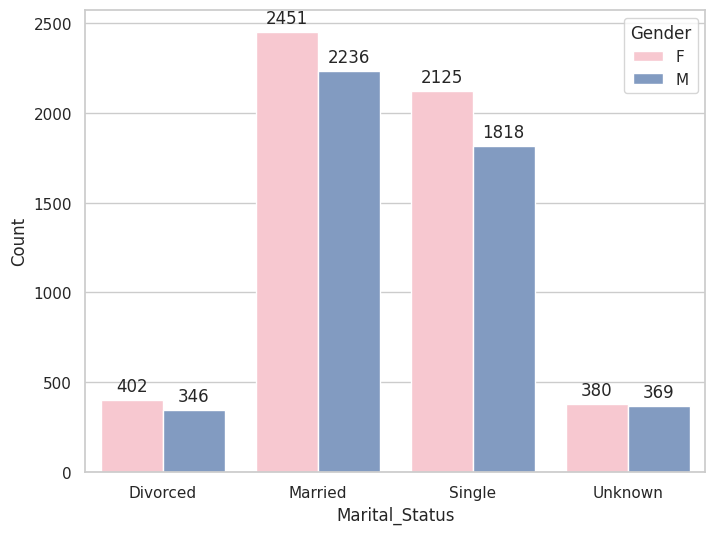

In [204]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

custom_palette = {"M": '#7799cc', "F": "pink"}

ax = sns.barplot(data=relation_counts, x='Marital_Status', y='count', hue='Gender', palette=custom_palette)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


plt.ylabel('Count')
plt.legend(title='Gender')

plt.show()

<h3>📍📍Distribution of Marital_Status for Attrition_Flag

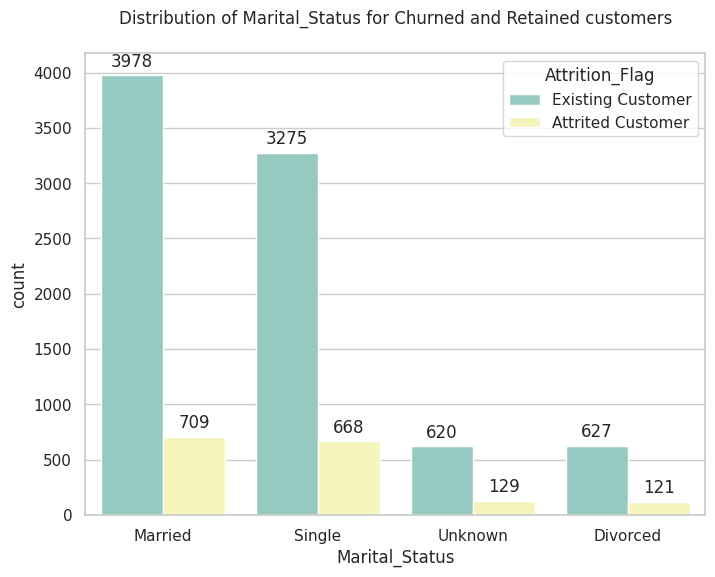

In [206]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

ax=sns.countplot(x='Marital_Status', hue='Attrition_Flag', palette='Set3', data=df)


# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.title("Distribution of Marital_Status for Churned and Retained customers\n",fontsize=12)

plt.show()

<h3>📍📍'Education_Level' col

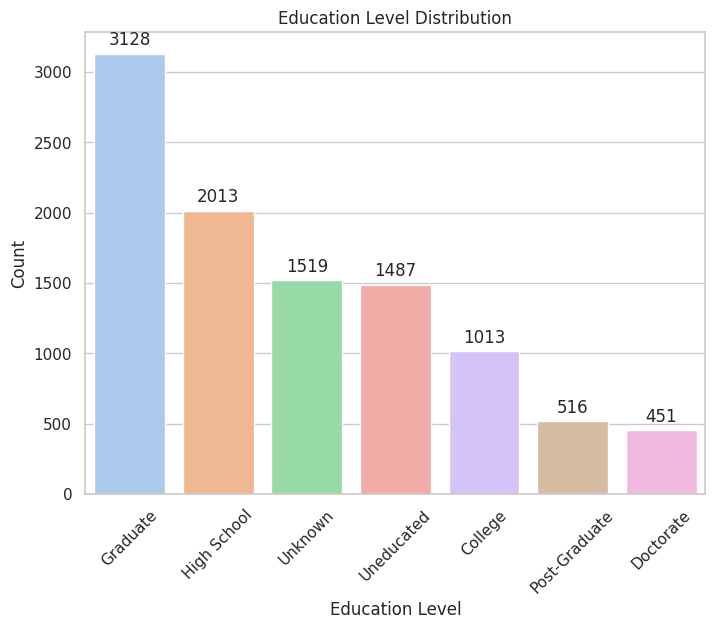

In [207]:
education_counts = df['Education_Level'].value_counts()

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")


ax = sns.barplot(x=education_counts.index, y=education_counts.values, palette='pastel')

# Add counts above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    

plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()


<h3>📍📍'Months_on_book' col

Most freq Months_on_book is  36
Range of Months_on_book from  13 to  73


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


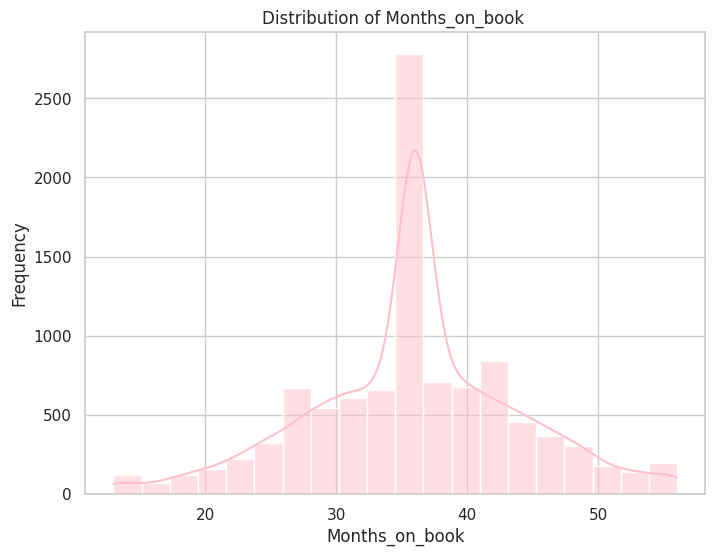

In [208]:
print("Most freq Months_on_book is ",df['Months_on_book'].mode()[0])
print("Range of Months_on_book from ",df['Months_on_book'].min(),"to ",df['Customer_Age'].max())


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.histplot(df['Months_on_book'], bins=20, kde=True, color='pink')



plt.title('Distribution of Months_on_book ')
plt.xlabel('Months_on_book')
plt.ylabel('Frequency')

plt.show()

<h3>📍📍"Avg_Utilization_Ratio" col

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


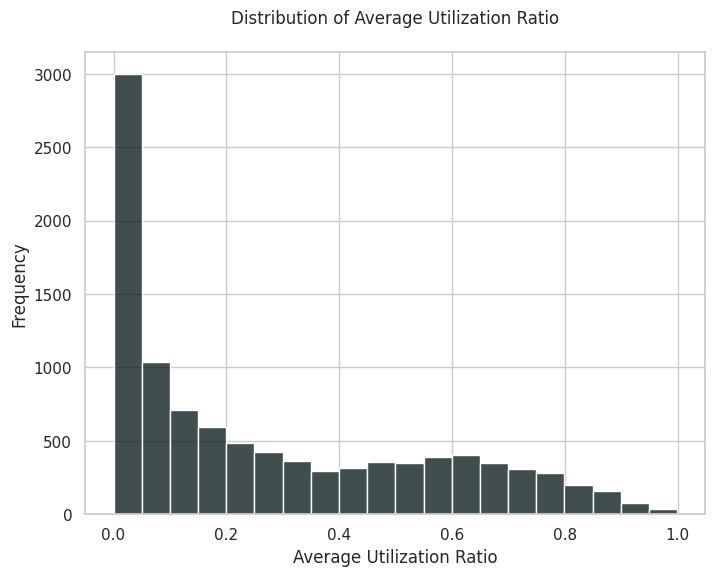

In [224]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.histplot(df['Avg_Utilization_Ratio'], bins=20, kde=False, color='#011314')  # Adjust bins as needed
plt.title('Distribution of Average Utilization Ratio\n',fontsize=12)
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Frequency')
plt.show()


<h3>📍📍Correlation between 'Months_on_book' and 'Customer_Age'

Correlation between 'Months_on_book' and 'Customer_Age': 0.7889123589930521


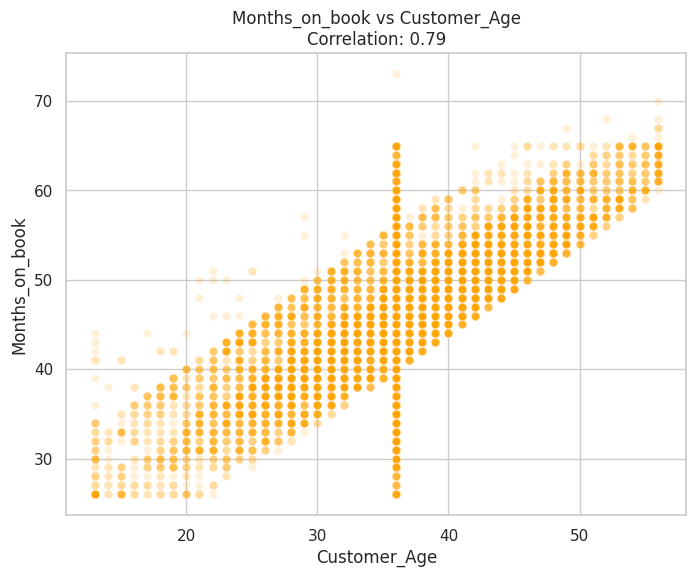

In [225]:

correlation = df['Months_on_book'].corr(df['Customer_Age'])

print("Correlation between 'Months_on_book' and 'Customer_Age':", correlation)

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='Months_on_book', y='Customer_Age', data=df,color='orange', alpha=0.15)

plt.title(f"Months_on_book vs Customer_Age\nCorrelation: {correlation:.2f}") 
plt.xlabel('Customer_Age')
plt.ylabel('Months_on_book')
plt.show()

<h3>📍📍Correlation between 'Total_Revolving_Bal' and 'Avg_Utilization_Ratio

Correlation between 'Total_Revolving_Bal' and 'Avg_Utilization_Ratio': 0.6240219910059075


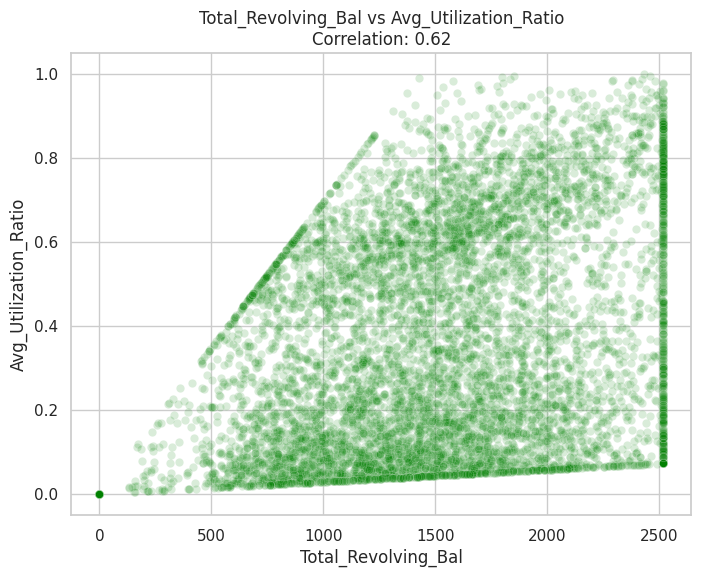

In [226]:
correlation = df['Total_Revolving_Bal'].corr(df['Avg_Utilization_Ratio'])

print("Correlation between 'Total_Revolving_Bal' and 'Avg_Utilization_Ratio':", correlation)


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', data=df, color='green', alpha=0.15)

plt.title(f"Total_Revolving_Bal vs Avg_Utilization_Ratio\nCorrelation: {correlation:.2f}")  
plt.xlabel('Total_Revolving_Bal')
plt.ylabel('Avg_Utilization_Ratio')
plt.show()

<h3>📍📍Income Category by Gender

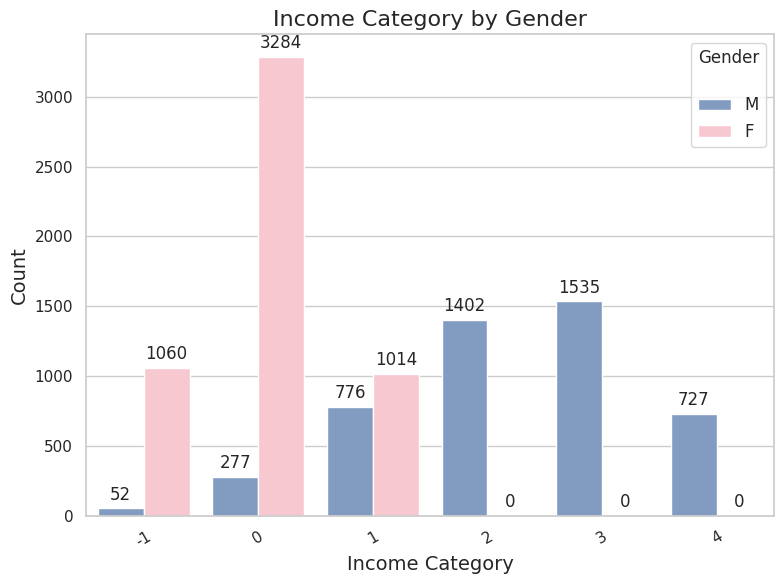

In [227]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

custom_palette = {"M": '#7799cc', "F": "pink"}

ax=sns.countplot(x='Income_Category', hue='Gender', data=df, palette=custom_palette)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Income Category by Gender', fontsize=16)
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=30) 
plt.legend(title='Gender\n', fontsize=12)
plt.tight_layout()
plt.show()


<h3>📍📍Summarize for some of Numericla Cols

In [ ]:
df_temp=df[['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','naive1','naive2']]

df_temp.describe()

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,naive1,naive2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


<h3>📍📍Shuffle The Data

In [228]:
from sklearn.utils import shuffle
df = shuffle(df)

df.reset_index(drop=True, inplace=True) #Reset index after snuffling 
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,naive1,naive2
0,720508233,Attrited Customer,62,M,0,Unknown,Single,1,Silver,42,...,17161.0,0,17161.0,0.552,1898,42,0.556,0.000,0.998120,0.001877
1,719353158,Existing Customer,56,M,1,College,Married,3,Blue,45,...,4145.0,1468,2677.0,0.579,1238,36,0.500,0.354,0.000085,0.999920
2,717987258,Existing Customer,43,F,3,Unknown,Single,1,Blue,36,...,2594.0,1686,908.0,0.624,4503,67,0.811,0.650,0.000372,0.999630
3,827062158,Existing Customer,58,M,2,High School,Single,3,Blue,54,...,22981.0,1696,21285.0,0.466,4192,66,0.571,0.074,0.000175,0.999830
4,712640583,Existing Customer,60,F,0,Doctorate,Married,-1,Blue,51,...,7508.0,2148,5360.0,0.890,4950,70,0.707,0.286,0.000115,0.999880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,714848958,Attrited Customer,47,F,2,Graduate,Single,0,Gold,37,...,15109.0,897,14212.0,0.494,2315,43,0.303,0.059,0.987510,0.012490
10123,713819283,Existing Customer,51,M,1,Uneducated,Married,3,Blue,42,...,25197.0,2517,22680.0,0.721,3002,58,0.812,0.100,0.000110,0.999890
10124,778899708,Attrited Customer,56,F,2,Unknown,Single,1,Blue,37,...,2963.0,0,2963.0,0.902,2919,47,0.382,0.000,0.995270,0.004729
10125,809951133,Attrited Customer,54,M,3,College,Single,4,Blue,49,...,34516.0,0,34516.0,1.203,2115,24,0.263,0.000,0.994850,0.005150


# 📌Modeling Time

<h3>📍📍Convert categorical features to Numerical 

In [229]:
df_encoded = pd.get_dummies(df, drop_first=True)  # Drop_first=True to avoid multicollinearity
df_encoded['Attrition_Flag_Existing Customer']

0        False
1         True
2         True
3         True
4         True
         ...  
10122    False
10123     True
10124    False
10125    False
10126     True
Name: Attrition_Flag_Existing Customer, Length: 10127, dtype: bool

In [230]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [231]:
df_encoded.dtypes

CLIENTNUM                             int64
Customer_Age                          int64
Dependent_count                       int64
Income_Category                       int64
Months_on_book                        int64
Total_Relationship_Count              int64
Months_Inactive_12_mon                int64
Contacts_Count_12_mon                 int64
Credit_Limit                        float64
Total_Revolving_Bal                   int64
Avg_Open_To_Buy                     float64
Total_Amt_Chng_Q4_Q1                float64
Total_Trans_Amt                       int64
Total_Trans_Ct                        int64
Total_Ct_Chng_Q4_Q1                 float64
Avg_Utilization_Ratio               float64
naive1                              float64
naive2                              float64
Attrition_Flag_Existing Customer       bool
Gender_M                               bool
Education_Level_Doctorate              bool
Education_Level_Graduate               bool
Education_Level_High School     

<h3>📍📍Resample The Data

In [232]:
from sklearn.utils import resample

# Separate the majority (Existing Customer) and minority (Attrited Customer) classes
df_majority = df_encoded[df_encoded['Attrition_Flag_Existing Customer'] == 1]
df_minority = df_encoded[df_encoded['Attrition_Flag_Existing Customer'] == 0]

# Downsample the majority class to match the number of samples in the minority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,  # Sample without replacement
                                   n_samples=len(df_minority),  # Match the number of samples in minority class
                                   random_state=42)  # Set random state for reproducibility

# Combine the downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])



In [233]:
df_downsampled.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Income_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'naive1', 'naive2', 'Attrition_Flag_Existing Customer', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

<h3>📍📍Features and Target Selection

In [234]:
# Separate features (X) and target variable (y)
X = df_downsampled.drop(columns=['Attrition_Flag_Existing Customer','CLIENTNUM','naive1','naive2'])
y = df_downsampled['Attrition_Flag_Existing Customer']

<h3>📍📍Standardarization 

In [235]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h3>📍📍Spliting The Data

In [236]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>📍📍Naive Bayes Model

In [237]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


GaussianNB()

<h3>📍📍Y_test Vs y_pred

In [238]:
y_pred = nb_classifier.predict(X_test)
comparison_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Display the comparison DataFrame
print(comparison_df.head(20))

       Predicted  Actual
4735       False   False
8382        True    True
8763       False   False
184         True    True
10111       True    True
3558        True    True
6549        True    True
1566       False   False
6155        True   False
6504       False   False
862         True    True
5478       False    True
6170       False    True
2590        True    True
914        False   False
3256        True    True
5094        True    True
213        False    True
3632       False   False
1559        True    True


# 📌Evaluation of the Model

<h3>📍📍Confusion Matrix

In [239]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for naive_bayes:')
print(conf_matrix)

print("__"*50 )

print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

Confusion Matrix for naive_bayes:
[[248  54]
 [ 83 266]]
____________________________________________________________________________________________________
num of True Positive : 266
num of True Negative : 248
num of False Positive : 54
num of False Negative : 83


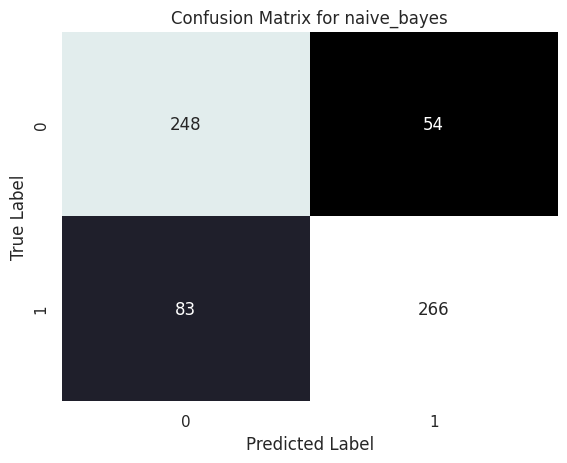

In [240]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for naive_bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h3>📍📍Classification Report

In [241]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for naive_bayes:')
print(classification_rep)


Classification Report for naive_bayes:
              precision    recall  f1-score   support

       False       0.75      0.82      0.78       302
        True       0.83      0.76      0.80       349

    accuracy                           0.79       651
   macro avg       0.79      0.79      0.79       651
weighted avg       0.79      0.79      0.79       651



<h3>📍📍Accuracy Score

In [243]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of The model : {accuracy*100:.2f} %')

Accuracy of The model : 78.96 %


<h1> Wish U luck 💕💕
<h3>Esraa Meslam